# Sentiment Analysis for the corona-virus over the year 2020

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

In [ ]:
!pip install pandas==1.0.5

In [ ]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
from collections import namedtuple

!pip install text2emotion

import text2emotion as te

In [6]:
# Reding the pickle file for only year 2020, for Fox News and New York Times
# and storing it 
PATH = '/content/drive/Shareddrives/ADA/Quotations_Fox_NY/'
y = 2020
df_fox = pd.DataFrame()
df_ny = pd.DataFrame()

df_fox = pd.read_pickle(PATH + str(y) + '_' + 'Fox_quotations.pkl')
df_ny = pd.read_pickle(PATH + str(y) + '_'+'NY_quotations.pkl')

In [7]:
df_fox = df_fox.to_frame()
df_ny = df_ny.to_frame()

# Putting all quotes to lower case so that all words wanted can be identified
df_fox = df_fox['quotation'].str.lower()
df_ny = df_ny['quotation'].str.lower()

df_fox_covid = pd.DataFrame()
df_ny_covid = pd.DataFrame()
df_fox = df_fox.to_frame()
df_ny = df_ny.to_frame()

df_fox_covid = df_fox[df_fox['quotation'].str.contains('covid|chloroquine|\
                              corona|virus|vaccin|pandemi')]
df_ny_covid = df_ny[df_ny['quotation'].str.contains('covid|chloroquine|\
                              corona|virus|vaccin|pandemi')]

In [ ]:
df_cov_t = pd.DataFrame(columns=['emotion','value','journal'])

#Covid emotion analysis for Foxnews
for quotation in df_fox_covid['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal':\
                             "foxnews"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal': \
                             "foxnews"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal': \
                             "foxnews"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, \
                             'journal': "foxnews"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': \
                             "foxnews"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    



#Covid emotion analysis for New York Times
for quotation in df_ny_covid['quotation']:
    
    di=te.get_emotion(quotation)
    fear=di.get('Fear')
    happy=di.get('Happy')
    angry=di.get('Angry')
    surprise=di.get('Surprise')
    sad=di.get('Sad')
    
    newr = pd.Series(data = {'emotion': "fear", 'value': fear, 'journal': \
                             "nytimes"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "happy", 'value': happy, 'journal':\
                             "nytimes"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "angry", 'value': angry, 'journal':\
                             "nytimes"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    

    newr = pd.Series(data = {'emotion': "surprise", 'value': surprise, \
                             'journal': "nytimes"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)
    
    newr = pd.Series(data = {'emotion': "sad", 'value': sad, 'journal': \
                             "nytimes"}, name = 'x')
    df_cov_t = df_cov_t.append(newr, ignore_index=True)


In [ ]:
res = stats.ttest_ind(df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="fear"]['value'],
                      df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="fear"]['value'],equal_var=True)
res2 = stats.ttest_ind(df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="happy"]['value'],
                       df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="happy"]['value'],equal_var=True) 
res3 = stats.ttest_ind(df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="angry"]['value'],
                       df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="angry"]['value'],equal_var=True) 
res4 = stats.ttest_ind(df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="surprise"]['value'],
                       df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="surprise"]['value'],equal_var=True) 
res5 = stats.ttest_ind(df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="sad"]['value'],
                       df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="sad"]['value'],equal_var=True) 

print(res)
print(res2)
print(res3)
print(res4)
print(res5)

Ttest_indResult(statistic=0.6813973601464404, pvalue=0.49566277217521393)
Ttest_indResult(statistic=1.6214248834690632, pvalue=0.10501182218710915)
Ttest_indResult(statistic=-1.0868720298157701, pvalue=0.2771642252534133)
Ttest_indResult(statistic=3.6144405730192704, pvalue=0.0003050075595739164)
Ttest_indResult(statistic=-1.1972808277735325, pvalue=0.2312738766648926)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to ma

In [ ]:
fox_fear = df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="fear"]['value']
ny_fear = df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="fear"]['value']

fox_happy = df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="happy"]['value']
ny_happy = df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="happy"]['value']

fox_angry = df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="angry"]['value']
ny_angry = df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="angry"]['value']

fox_surprise = df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="surprise"]['value']
ny_surprise = df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="surprise"]['value']

fox_sad = df_cov_t[df_cov_t['journal']=="foxnews"][df_cov_t['emotion']=="sad"]['value']
ny_sad = df_cov_t[df_cov_t['journal']=="nytimes"][df_cov_t['emotion']=="sad"]['value']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipyker

In [ ]:
# Bootstrapping for a 95% confidence interval

# Input: the array and the number of random samples (e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [ ]:
#CI Foxnews
[lowerF_fear, upperF_fear] = bootstrap_CI(fox_fear, 1000)
[lowerF_happy, upperF_happy] = bootstrap_CI(fox_happy, 1000)
[lowerF_angry, upperF_angry] = bootstrap_CI(fox_angry, 1000)
[lowerF_surprise, upperF_surprise] = bootstrap_CI(fox_surprise, 1000)
[lowerF_sad, upperF_sad] = bootstrap_CI(fox_sad, 1000)

In [ ]:
std_fox = [upperF_fear - lowerF_fear, upperF_happy - lowerF_happy, \
           upperF_angry - lowerF_angry, upperF_surprise - lowerF_surprise, \
           upperF_sad - lowerF_sad]

In [ ]:
[lowerN_fear, upperN_fear] = bootstrap_CI(ny_fear, 1000)
sdt_fearN = upperN_fear-lowerN_fear
[lowerN_happy, upperN_happy] = bootstrap_CI(ny_happy, 1000)
[lowerN_angry, upperN_angry] = bootstrap_CI(ny_angry, 1000)
[lowerN_surprise, upperN_surprise] = bootstrap_CI(ny_surprise, 1000)
[lowerN_sad, upperN_sad] = bootstrap_CI(ny_sad, 1000)

In [ ]:
std_ny = [upperN_fear - lowerN_fear, upperN_happy - lowerN_happy, \
          upperN_angry - lowerN_angry, upperN_surprise - lowerN_surprise, \
          upperN_sad - lowerN_sad]

In [ ]:
lista2 = ['fear', 'happy', 'angry', 'surprise', 'sad']
sentiment = [fox_fear.mean(), fox_happy.mean(), fox_angry.mean(), \
             fox_surprise.mean(), fox_sad.mean()]
sentiment1 = [ny_fear.mean(), ny_happy.mean(), ny_angry.mean(), \
              ny_surprise.mean(), ny_sad.mean()]

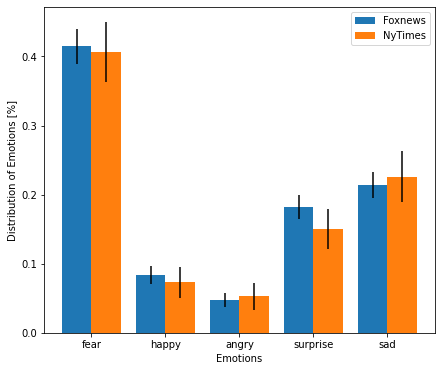

In [ ]:
plt.figure(figsize=(7,6))
x = lista2
x_axis = np.arange(len(lista2))

plt.bar(x_axis - 0.2, sentiment, 0.4, yerr=std_fox, label='Foxnews')
plt.bar(x_axis + 0.2, sentiment1, 0.4, yerr=std_ny, label = 'NyTimes')
 
plt.xticks(x_axis, x)
plt.xlabel('Emotions')
plt.ylabel('Distribution of Emotions [%]')
plt.legend()
plt.show()

# Positive and Negative Sentiment Analysis for covid-19

In [8]:
def fon_text2 (df):
    Desc = namedtuple("Desc", ["fear", "happy", "angry","surprise","sad","length"])
    df_quotes = df['quotation']
    dfsize=len(df_quotes)
    fear=0
    happy=0
    angry=0
    surprise=0
    sad=0
    average_fear=0
    average_happy=0
    average_angry=0
    average_surprise=0
    average_sad=0

    for quotation in df_quotes:
        di=te.get_emotion(quotation)
        fear+=di.get('Fear')
        happy+=di.get('Happy')
        angry+=di.get('Angry')
        surprise+=di.get('Surprise')
        sad+=di.get('Sad')
    average_fear=fear/dfsize
    average_happy=happy/dfsize
    average_angry=angry/dfsize
    average_surprise=surprise/dfsize
    average_sad=sad/dfsize

    print("fear{}, happy{}, angry{}, surprise{}, sad{}".format(average_fear,average_happy,
                                                               average_angry,average_surprise,average_sad))
    return (Desc(fear,happy,angry,surprise,sad,dfsize,))

In [9]:
def fon_nltk (df):
    Desc = namedtuple("Desc", ["pos", "neg", "tot"])
    quotes=df['quotation']
    length= len(df)
    pos=0
    neg=0
    average_pos=0
    average_neg=0
    for quotation in quotes:
        result=sia.polarity_scores(quotation)
        pos+=result["pos"]
        neg+=result["neg"]
    average_pos=pos/length
    average_neg=neg/length
    print('Mean of positif and negatif feelings found respectively are:', average_pos,average_neg)
    return (Desc(pos, neg, length,))

In [10]:
pos=0
neg=0
length=0
pos,neg,length=fon_nltk(df_ny_covid)
print(pos,neg,length)

Mean of positif and negatif feelings found respectively are: 0.07769628099173555 0.09556198347107445
75.21000000000001 92.50400000000006 968


In [11]:
pos=0
neg=0
length=0
pos,neg,length=fon_nltk(df_fox_covid)
print(pos,neg,length)

Mean of positif and negatif feelings found respectively are: 0.08978103001111505 0.0897988143756948
242.3189999999995 242.36700000000025 2699
